# Linear Regression 

Linear regression occurs when an independent variable (or multiple ones) can predict the outcome of a dependent variable. Linear regression can be recognized in a scatter plot of the independent variable(s) on the x-ax and the dependent variable on the y-ax. If a line can be drawn roughly through all the dots then the linear regression is acknowledged. Linear regression could both occur negative as well as positive. (e.g. increase of weight will worsen your ranking in a marathon race (negative linear regression), whereas increase of hours of training will also increase your ranking in a marathon race (positive linear regression)). 

# Cleaning the data

In [16]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('./mashable.csv')
df.dropna(how='all')
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


First I want to check what correlates most with the shares (which is the target). 

In [17]:
df.corr()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


As can be seen in the table above, the most correlating variables to the number of shares are the following (in descending order): global_subjectivity,  num_imgs, data_channel_is_socmed, data_channel_is_entertainment, weekday_is_saturday, weekday_is_sunday, title_subjectivity, global_sentiment_polarity. To make sure of this I will be using a scatterplot matrix.

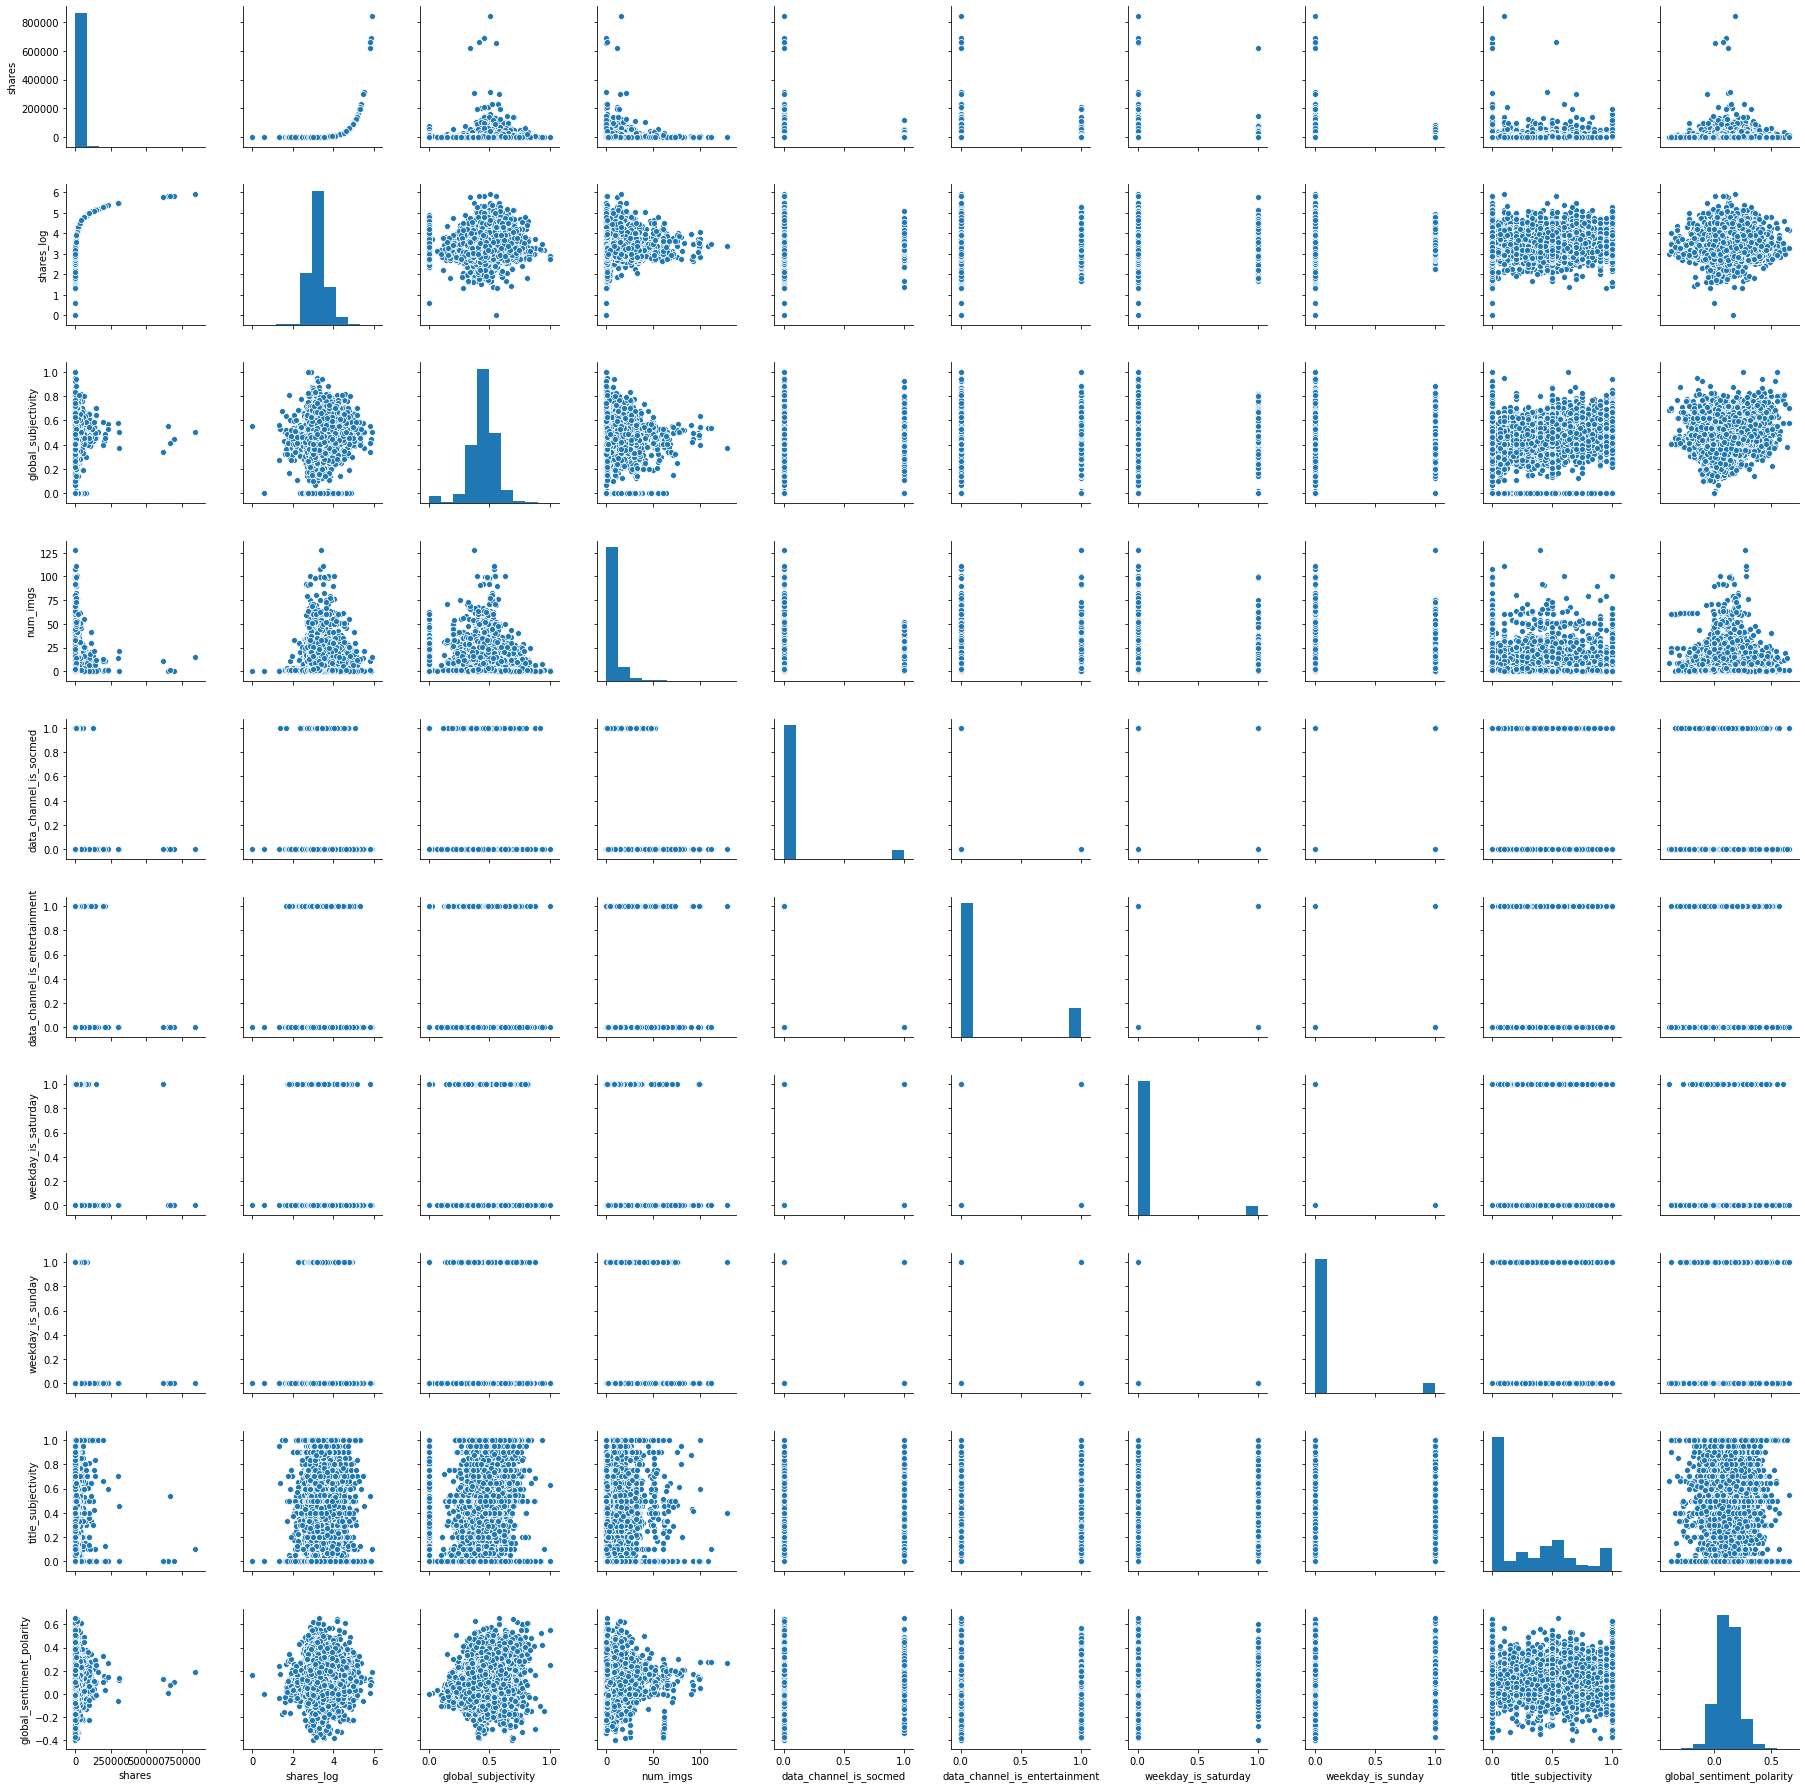

In [18]:
df_subset =  df[['shares','shares_log','global_subjectivity', 'num_imgs', 'data_channel_is_socmed', 'data_channel_is_entertainment', 'weekday_is_saturday', 'weekday_is_sunday', 'title_subjectivity', 'global_sentiment_polarity']]
sns.pairplot(df_subset)
plt.show()


# analysis
In the scatterplots the following can be recognized: 
global subjectivity and shares_log are lineary correlated, number of images and shares_log as well. The weekdays and channel type are hard to recognize because it that is either 0 or 1. It is however shown in in the table so I will resume using them. What can also be recognized is that global subjectivity and title subjectivity are correlated with eachother. 

The independent variables I will be using for my model are:
- global_subjectivity
- num_imgs
- type of channel
- type of day 
- title_sentiment_polarity (due to the fact that global subjectivity and title subjectivity were correlated and so were global subjectivity and global sentiment polarity )

# Resulting Dataframe
First I need to divide the data into an X and Y for the model to work. as shares_log is the dependent variable, this will be the Y. The dependent variables will together form the X

In [19]:
y = df['shares_log'] #We need to take out the shares_log as our Y-variable
X = df[['global_subjectivity','num_imgs','title_sentiment_polarity','data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']]
X.index = df['id'] #this stores the id, so we don't lose track of the articles later
X.head()

,global_subjectivity,num_imgs,title_sentiment_polarity,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
id,,,,,,,,,,,,,,,,
1,0.439379,12,0.375,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.300454,6,0.000,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0.575486,0,0.000,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.327220,2,0.000,0,0,1,0,0,0,0,0,0,1,0,0,0
5,0.507709,18,0.000,0,0,0,0,1,0,0,1,0,0,0,0,0


As you can see, all data_channel variables and weekday_is variables are now transformed into dummy variables. Now that I have my x and y, I am going to split them into a training and a test dataset. 

# The linear regression model

In [20]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,global_subjectivity,num_imgs,title_sentiment_polarity,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
id,,,,,,,,,,,,,,,,
20922,0.451711,0,0.136364,0,0,0,0,0,0,0,0,0,0,0,0,1
4486,0.476976,9,0.100000,0,0,0,0,0,0,0,0,0,1,0,0,0
17756,0.488495,1,0.000000,0,0,1,0,0,0,0,0,0,0,1,0,0
4705,0.545746,23,0.136364,0,0,0,0,0,0,0,0,1,0,0,0,0
13494,0.507042,13,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model with my train dataset

coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.160723,global_subjectivity
0.002575,num_imgs
0.046463,title_sentiment_polarity
-0.067822,data_channel_is_lifestyle
-0.203155,data_channel_is_entertainment
-0.142635,data_channel_is_bus
0.001857,data_channel_is_socmed
-0.088485,data_channel_is_tech
-0.230527,data_channel_is_world
-0.018923,weekday_is_monday


In [29]:
b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0]#lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b2 = lm.coef_[1]
b3 = lm.coef_[2]
b4 = lm.coef_[3]
b5 = lm.coef_[4]
b6 = lm.coef_[5]
b7 = lm.coef_[6]
b8 = lm.coef_[7]
b9 = lm.coef_[8]
b10 = lm.coef_[9]
b11 = lm.coef_[10]
b12 = lm.coef_[11]
b13 = lm.coef_[12]
b14 = lm.coef_[13]
b15 = lm.coef_[14]
b16 = lm.coef_[15]


print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X + {b2:.2f}X2 + {b3:.2f}X3 + {b4:.2f}X4 + {b5:.2f}X5 + {b6:.2f}X6 + {b7:.2f}X7 + {b8:.2f}X8 + {b9:.2f}X9 + {b10:.2f}X10 + {b11:.2f}X11 + {b12:.2f}X12 + {b13:.2f}X13 + {b14:.2f}X14 + {b15:.2f}X15 + {b16:.2f}X16") #.0f formats to 2 decimals.

The regression line is equal to y = 3.31 + 0.16X + 0.00X2 + 0.05X3 + -0.07X4 + -0.20X5 + -0.14X6 + 0.00X7 + -0.09X8 + -0.23X9 + -0.02X10 + -0.04X11 + -0.04X12 + -0.05X13 + -0.01X14 + 0.09X15 + 0.08X16


$y = 3.31 + 0.16X + 0.00X2 + 0.05X3 + -0.07X4 + -0.20X5 + -0.14X6 + 0.00X7 + -0.09X8 + -0.23X9 + -0.02X10 + -0.04X11 + -0.04X12 + -0.05X13 + -0.01X14 + 0.09X15 + 0.08X16$

In [22]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p) #do a R^2 test on the predicted y variable compared to the real test y variable

0.06172864994475702

the $R^2$ value is 0.06 which means that 6% of the variation in the shares can be explained by the model. 

In [23]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.3933000863416717

In [39]:
print(10** 0.3933000863416717, 'in total shares')

2.4734326331610976 in total shares


The $RMSE$ of the model is 0.39 which means the model is typically $2.47$  shares off

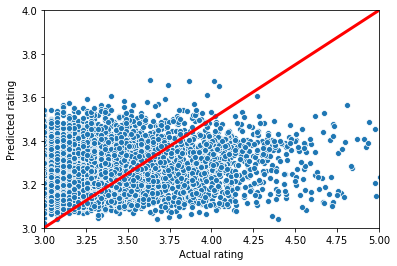

In [42]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted rating')
plt.xlim([3,5]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([3,4])
plt.plot([3, 5], [3, 4], color='red', lw=3) #Plot a diagonal length
plt.show()

The predictions really are quiet poorly because the line moves lineary where it should however be horizontal. I don't really understand how this went wrong. 